# EDA | Twitter ( HK NLP Project )

# Table of Contents<a id='#home'></a>
* [2.0 Exploratory Data Analysis (EDA)](#eda)
  * [2.1 Contents](#eda_contents)
    * [2.1.1 Libraries & Code](#eda_lib)
    * [2.1.2 DataFrames](#eda_dfs)
  * [2.2 Charts](#eda_chart)
    * [2.2.1 Histograms](#eda_hist)
    * [2.2.2 Boxplot](#eda_box)
    * [2.2.3 Bar Charts](#eda_bar)
    * [2.2.4 _________](#eda_)
  * [2.3 Word Cloud](#eda_wc)
    * [2.3.1 _________](#_________)
    * [2.3.2 _________](#_________)
  * [2.4 Sentiment Analysis](#eda_senti)
    * [2.4.1 _________](#_________)
    * [2.4.2 _________](#_________)
  * [2.5 Named Entity Recognition](#eda_ner)
    * [2.5.1 _________](#_________)
    * [2.5.2 _________](#_________)
  * [2.6 Parts of Speech](#eda_pos)
    * [2.6.1 _________](#_________)
    * [2.6.2 _________](#_________)
  * [2.7 Readability](#eda_readability)
    * [2.7.1 _________](#_________)


  * [2.8 Overall EDA](#overall_eda)
    * [2.8.1 _________](#_________)
    * [2.8.2 _________](#_________)
    * [2.8.3 _________](#_________)
  * [2.9 EDA Summary](#eda_summary)



# **2.1 Contents & Imports**<a id='Contents'></a>

Here we will do Exploratory data analysis (**EDA**) **to summarize their main characteristics to identify what the data may be telling us**. We have decided to section this part off from the Data Wrangling section for the following reason:
   * It can take ~15-20 hours for the code to complete in Data Wrangling

As a reminder, **we have three (3) data frames**; notably:
   * **Main |** The back end of cleaned data frame.
     * `df_main`
   * **TfidfVectorizer |** df_main with TfidfVectorizer.
     * `df_tweets_tfidf`
   * **CountVectorizer |** df_main with CountVectorizer.
     * `df_tweets_cvec`

**Our overall findings will be found in the section below**:
   * EDA Summary

To avoid confusion, **people who tweet will be labeled as** (**"Tweeters"**) herein.

<a id='eda_dfs'></a>**Libraries & Code**

In [1]:
# Main Imports
import os
import sys
import statistics
from scipy.stats import skew
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
%matplotlib inline
import datetime
import time
import warnings
warnings.filterwarnings("ignore")
%reload_ext watermark
import enchant 

# NLP Imports
import re
import string
import requests
import urllib.request
import nltk
import pickle
import emoji
from better_profanity import profanity
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from spacy.language import Language

from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import spacy
import en_core_web_sm
nltk.download("stopwords")
stop = stopwords.words('english')
stops =  set(stopwords.words('english')+['com'])
stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

results = Counter()

# from polyglot.text import Text

# The below 2 may be required
# import nltk
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

# Still importing twint
import twint
import nest_asyncio
nest_asyncio.apply()

%watermark -d -t -v -p pandas

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

pandas: 1.2.4



<a id='eda_dfs'></a>**DataFrames** | Here we will import the data frames built during Data Wrangling.

In [2]:
cd

C:\Users\rands


In [3]:
df = pd.read_excel('./_Capstone_Two_NLP/data/_twitter/_dfs_fortheside/df_main.xlsx')
df = df.reset_index()
df = df.drop(columns=['Unnamed: 0','index'])

In [4]:
# checking to see if it was pulled in correctly
df.head(2)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,neg,neu,pos,tweet_stemmed,tweet_lemmatized,#_words_tweet,#_hashtags
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks speaking us #fridaysforfreedom #fightfo...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",0.4404,0.000,0.707,0.293,"['thank', 'speak', 'us', 'fridaysforfreedom', ...","['Thanks', 'speaking', 'u', '#fridaysforfreedo...",5,2
1,#FightForHongKong,2020-08-25,peterhjorth_ddp,How stop China Hong Kong. Read new report Dani...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",-0.2960,0.071,0.929,0.000,"['stop', 'china', 'hong', 'kong', 'read', 'new...","['How', 'stop', 'China', 'Hong', 'Kong.', 'Rea...",25,13


In [5]:
df_tweets_tfidf = pd.read_pickle("./_Capstone_Two_NLP/data/_twitter/_dfs_fortheside/df_tfidf.pkl")

In [6]:
# checking to see if it was pulled in correctly
df_tweets_tfidf.head(1)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,...,香港国家安全法,香港暴徒,香港版国家安全法に抗議します,香港獨立,香港獨立唯一出路,香港警察,黃色經濟圈,黑警,黑警死全家,홍콩
0,#FightForHongKong,2020-08-28,ginny81025554,thanks speaking us #fridaysforfreedom #fightfo...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",0.4404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**I NEED TO UPDATE MY RAM TO IMPROVE THIS**

In [7]:
# df_tweets_cvec = pd.read_csv('./_Capstone_Two_NLP/data/_twitter/_dfs_fortheside/df_tweets_cvec.csv')
# df_tweets_cvec = df_tweets_cvec.reset_index()
# df_tweets_cvec = df_tweets_cvec.drop(columns=['Unnamed: 0','index'])

In [8]:
#to confirm no cells are null
print('Main_df Got Nulls? |',df.isnull().values.any(),'\n'
     'Tfidf Got Nulls?   |',df_tweets_tfidf.isnull().values.any(),'\n'
     #'CVec Got Nulls?    |'df_tweets_cvec.isnull().values.any(),
     )

Main_df Got Nulls? | False 
Tfidf Got Nulls?   | False 



In [9]:
df_tweets_tfidf.columns

Index(['hash', 'created_at', 'username', 'tweet', 'replies_count',
       'retweets_count', 'likes_count', 'reply_to', 'hashtags', 'comp',
       ...
       '香港国家安全法', '香港暴徒', '香港版国家安全法に抗議します', '香港獨立', '香港獨立唯一出路', '香港警察',
       '黃色經濟圈', '黑警', '黑警死全家', '홍콩'],
      dtype='object', length=10118)

**Code Defined** | We will display the Code Defined for the `df` only as the variables remain consistent throughout.

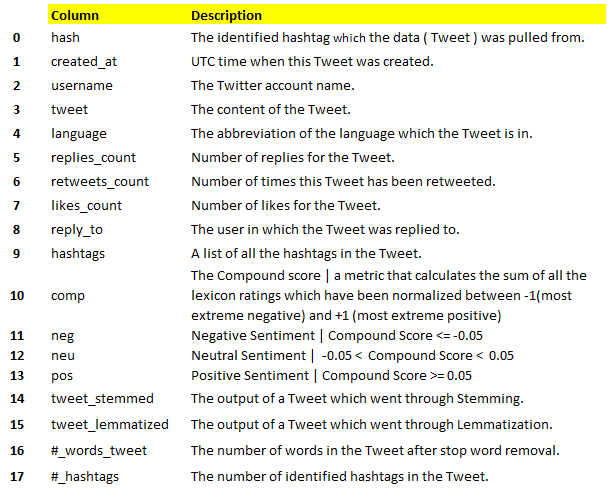

**We will run the `describe` function on the `main_df` only** as the numbers for `df_tweets_tfidf` & `df_tweets_cvec` aren't very relevant.

In [10]:
df.describe()

,replies_count,retweets_count,likes_count,comp,neg,neu,pos,#_words_tweet,#_hashtags
count,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000
mean,0.570889,6.148669,11.258169,0.095108,0.102678,0.728057,0.169265,14.371187,3.267876
std,13.535243,109.366725,173.143553,0.534434,0.124905,0.164872,0.161290,8.002316,2.637373
min,0.000000,0.000000,0.000000,-0.990100,0.000000,0.078000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,-0.361200,0.000000,0.616000,0.000000,8.000000,1.000000
50%,0.000000,0.000000,1.000000,0.077200,0.065000,0.725000,0.144000,13.000000,3.000000
75%,0.000000,1.000000,2.000000,0.539900,0.179000,0.835000,0.270000,20.000000,4.000000
max,3014.000000,16023.000000,32479.000000,0.998900,0.897000,1.000000,0.922000,65.000000,26.000000


# **2.2 Charts**<a id='eda_chart'></a>

<a id='eda_hist'></a>**Histograms** | Histograms are an excellent way to review the range and density of values for each numeric features in the data set.

There's a lot to work with in here. **We will start with the `SentimentIntensityAnalyzer` #'s.**

In [11]:
twit_eda_sia = df[['comp','neg','neu','pos']].copy()
twit_eda_sia.columns = ['Comp Score','Negative Lot','Neutral Lot','Positive Lot']

array([[<AxesSubplot:title={'center':'Comp Score'}>,
        <AxesSubplot:title={'center':'Negative Lot'}>],
       [<AxesSubplot:title={'center':'Neutral Lot'}>,
        <AxesSubplot:title={'center':'Positive Lot'}>]], dtype=object)

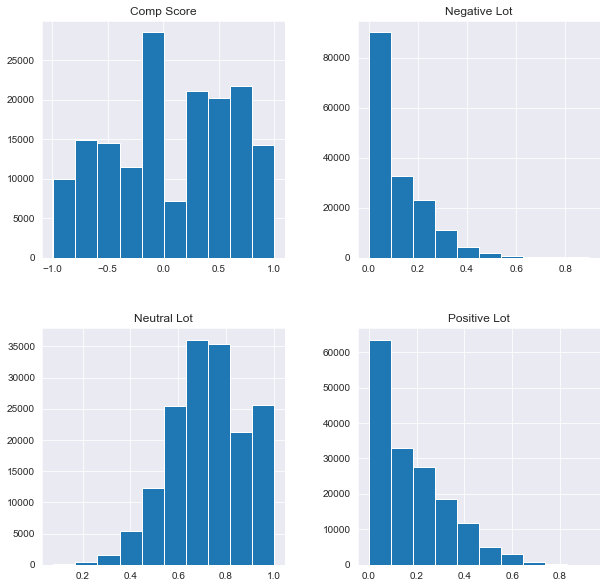

In [12]:
caption = 'Comp Score represents the Final Score while the word \'Lot\' refers to the % allocated.'
sns.set_style('darkgrid')
twit_eda_sia.hist(bins = 10,figsize=(10,10))
#fig.text(.5, .5, caption, ha='center')

Visually, the **skewness is seen in all except the `Comp Score`.**

The `Neutral Lot` has no visual skewness. 

In [13]:
print('Skewness Scores:','\n''\n',
      'Comp |', round(skew(twit_eda_sia['Comp Score']),2),'\n',
     'Negative |', round(skew(twit_eda_sia['Negative Lot']),2),'\n',
     'Positive |', round(skew(twit_eda_sia['Positive Lot']),2),'\n',
     'Neutral |', round(skew(twit_eda_sia['Neutral Lot']),2),)

Skewness Scores: 

 Comp | -0.26 
 Negative | 1.34 
 Positive | 0.84 
 Neutral | -0.11


The Skewness results show / suggest:
   * High Skewness
      * `Negative` | Negative Skewness | The Tweet population is **highly against the law** or **something associated with it**
   * Moderate Skewness
      * `Positive` | Negative Skewness | The Tweet population is **moderately for or against the law** or **something associated with it**

The `Comp` & `Neutral` came up fairly symmetrical which may be explained by:
   * `Neutral` usually ends up here for any review
   * `Comp` is mathematically a hybrid of positive & negative, thus could suggest polarity; this will be reviewed / confirmed at a later stage

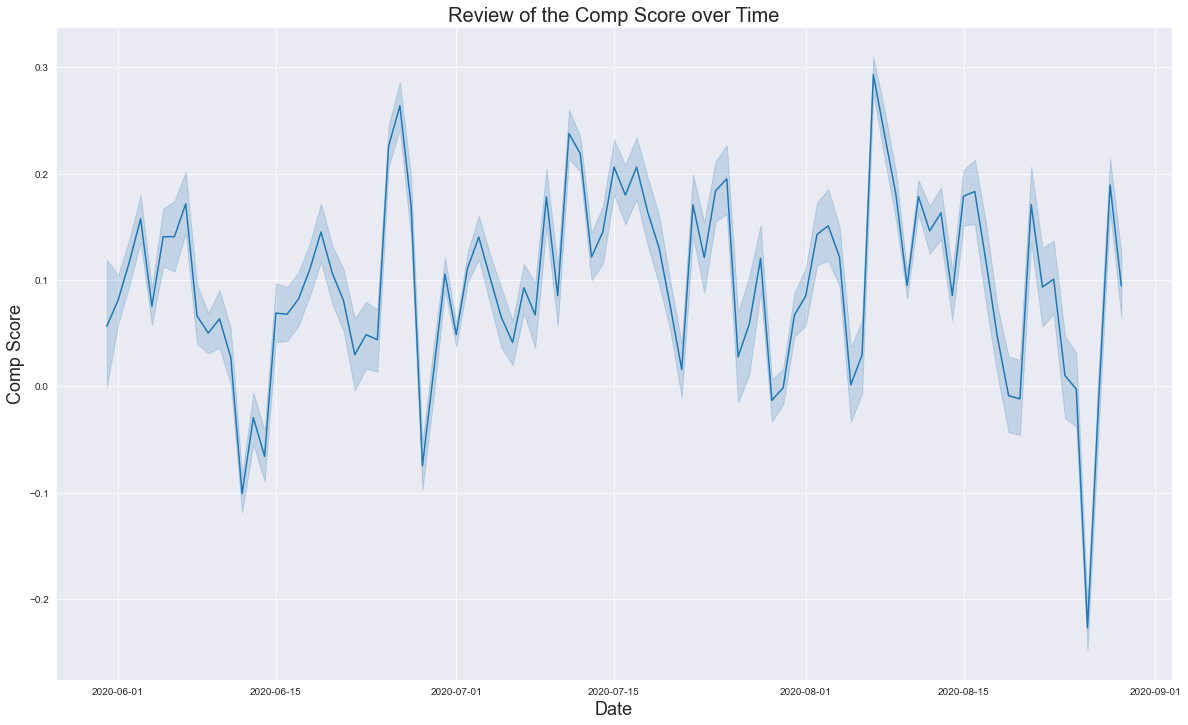

In [14]:
plt.figure(figsize=(20,12))
ax = sns.lineplot(data=df, x='created_at',y='comp')
# ax.set(xlabel='Comp Score', ylabel='Date', title='Review of the Comp Score over Time', fontsize=20)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Comp Score",fontsize=18)
plt.title("Review of the Comp Score over Time",fontsize=20)
plt.show()

**Initial Observations** | There appears to have been something:
   * Positive (+0.25) in:
      * Late June
      * Early August
   * Negative (-0.2) in:
     * Late August

We will keep this under consideration & dig a little deeper to see what was being discussed; **this may lead to the development of categories for the Tweets**.

In [15]:
df.comp.describe()

count    163699.000000
mean          0.095108
std           0.534434
min          -0.990100
25%          -0.361200
50%           0.077200
75%           0.539900
max           0.998900
Name: comp, dtype: float64

Let's define the parameters as:
   * Positve | +0.53
   * Negative | -0.36 

In [16]:
tw_above = df[(df.comp >= 0.53)]
tw_below = df[(df.comp <= -0.36)] 

We **will start** by looking at the **key words in Tweets at or below -0.36**

In [17]:
# we will first convert the text from all the titles into one string.
tweet_text = ''.join(review for review in tw_below.tweet.astype(str))
len(tweet_text)

6348447

In [18]:
# the word cloud only accepts 1M so we will have to reassign
tweet_text = tweet_text[:999999]
len(tweet_text)

999999

In [19]:
# We then load the spaCy model to parse the text string int
nlp = spacy.load('en_core_web_sm')
doc = nlp(tweet_text)

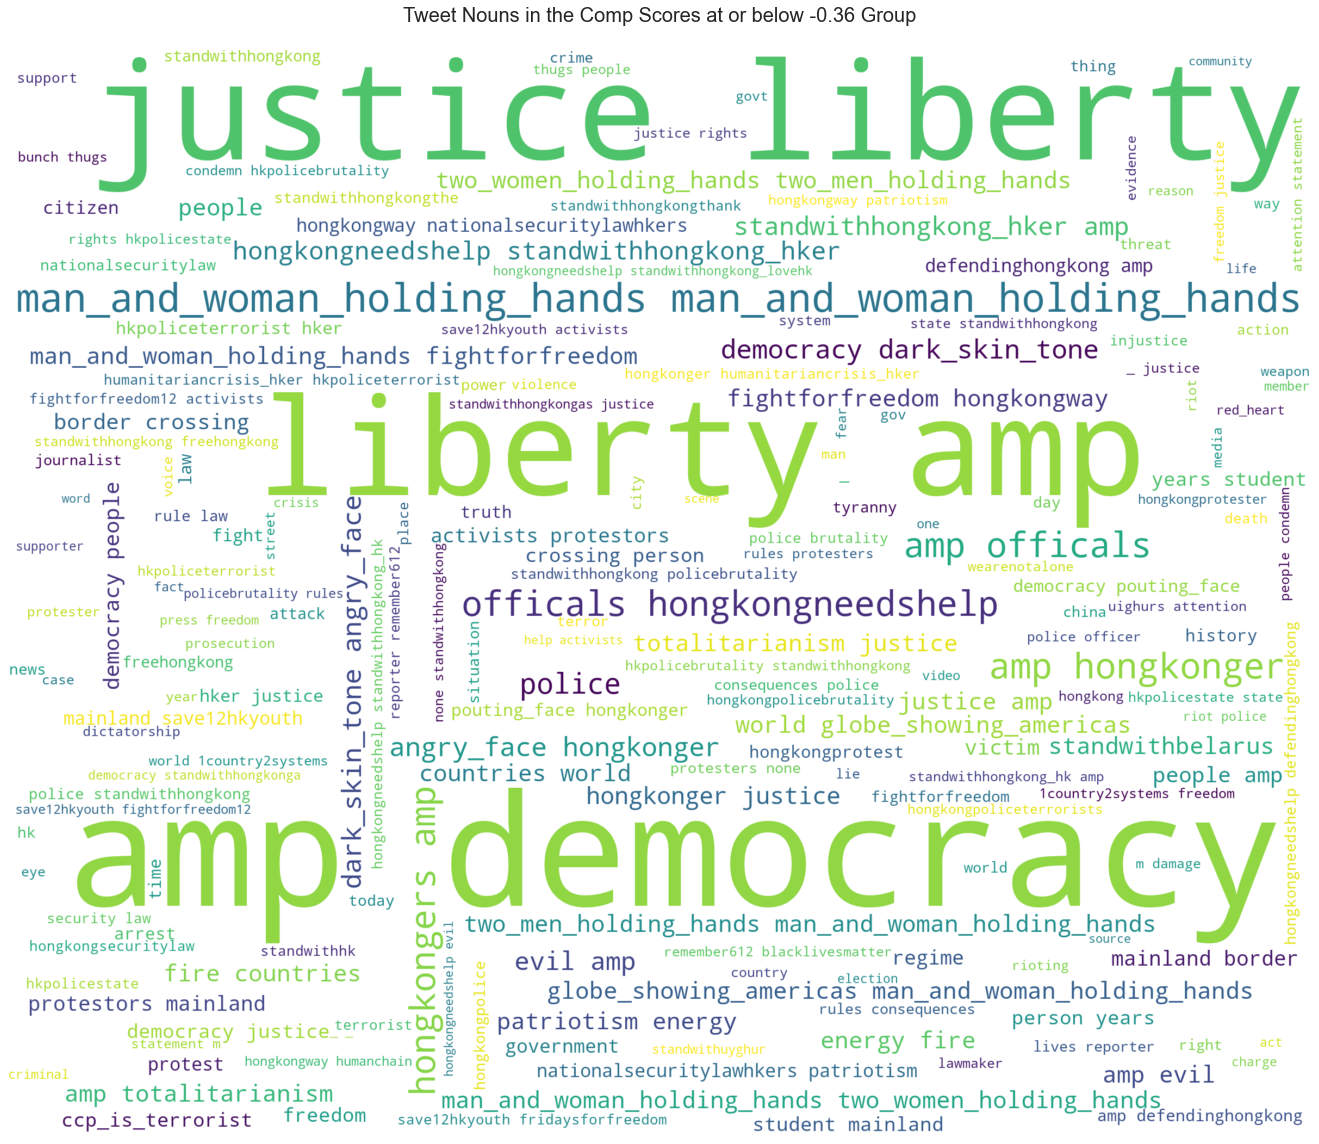

In [20]:
newText_t_noun =''
for word in doc:
    if word.pos_ in ['NOUN']:
        newText_t_noun = ' '.join((newText_t_noun, word.text.lower()))

wordcloud_title = WordCloud(stopwords=STOPWORDS,background_color='white',width=2400,height=2000).generate(newText_t_noun)
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.title('Tweet Nouns in the Comp Scores at or below -0.36 Group\n', fontsize=20)
plt.axis('off')
plt.show()

In [21]:
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)

counts_neg = co.fit_transform(tw_below['tweet'])
counts_neg = pd.DataFrame(counts_neg.sum(axis=0),columns=co.get_feature_names())

# I will remove "obvious words" & incorrect word bi-grams
counts_neg = counts_neg.drop(columns = ['hong kong'])

counts_neg = counts_neg.T.sort_values(0,ascending=False)
counts_neg.columns = ['word_count']
counts_neg = counts_neg.head(30)
# counts_l_a.head(20)

Text(0.5, 1.0, 'Top 30 Bigrams Tweeters used in the at or below -0.36 Comp Score Group')

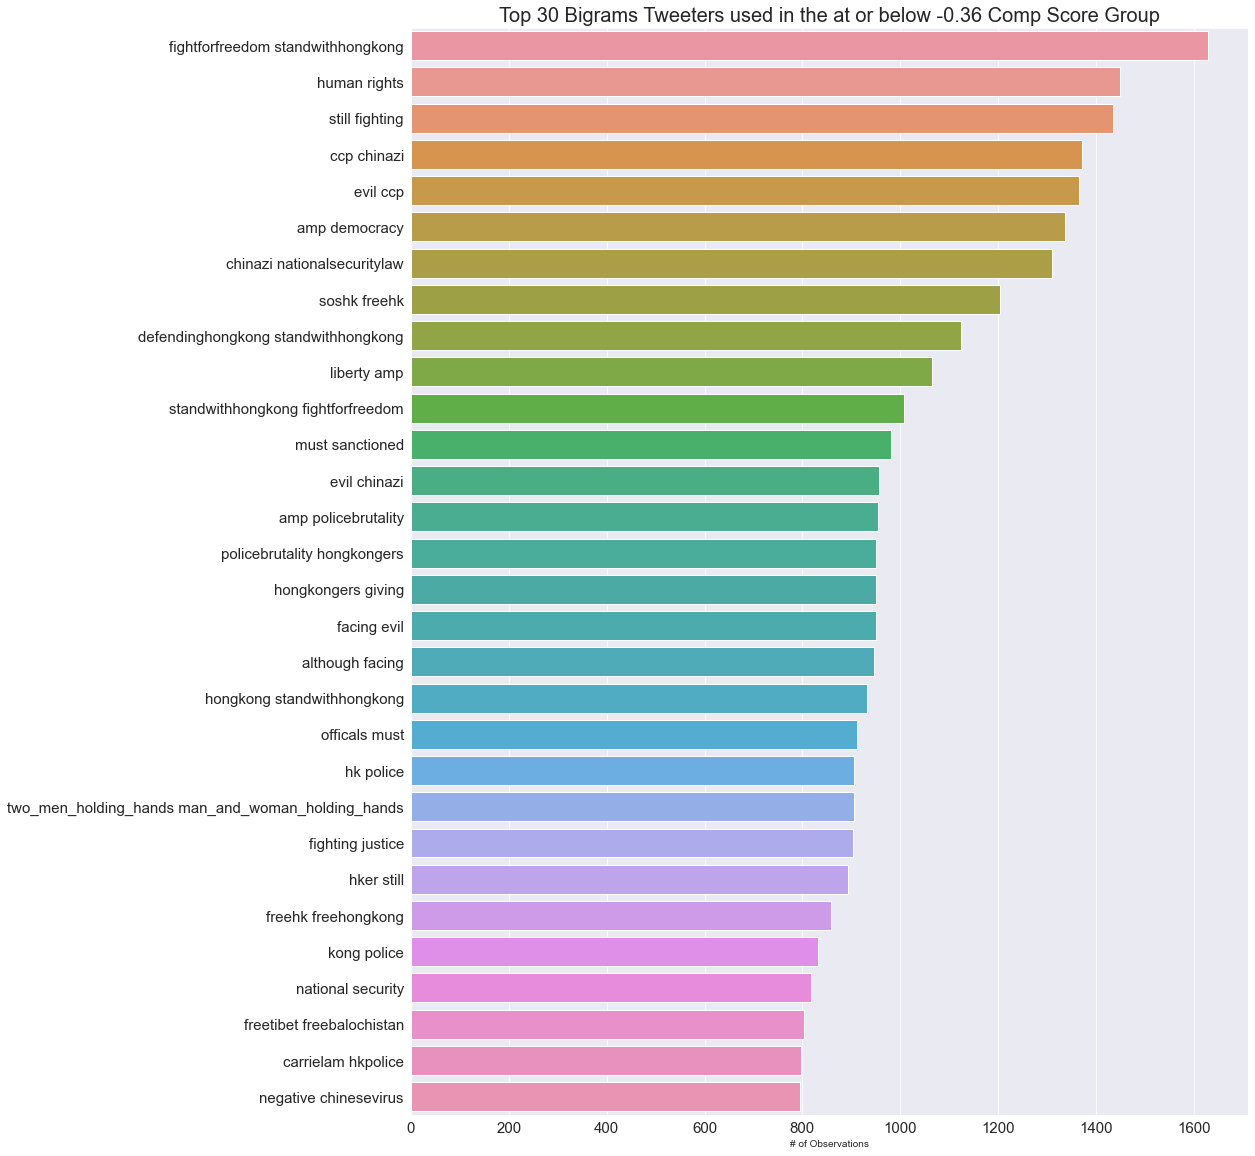

In [22]:
counts_neg_top = counts_neg.head(30)
counts_neg_top = counts_neg_top.reset_index()
counts_neg_top.columns = ['word','word_count']

fig, ax = plt.subplots(figsize=(15, 20))
sns.barplot(y = 'word',x = 'word_count',
            data = counts_neg_top.sort_values('word_count',ascending = False))
ax.set_xlabel('word_count')
plt.xlabel("# of Observations")
plt.ylabel("")
plt.tick_params(labelsize=15)
plt.title("Top 30 Bigrams Tweeters used in the at or below -0.36 Comp Score Group",fontsize=20)


**Negative Word Summary** | Many of the Tweets that were deemed `Negative` use Bigrams such as:
   * Human Rights
   * Evil CCP
   * References to Freedom / Democracy
   * Police Brutality
   * Fighting
   * Holdings Hands ( 👬 )
   * etc.
   

We will now look at the **key words in Tweets at or above 0.53**

In [23]:
# we will first convert the text from all the titles into one string.
tweet_text = ''.join(review for review in tw_above.tweet.astype(str))
len(tweet_text)

5445582

In [24]:
# the word cloud only accepts 1M so we will have to reassign
tweet_text = tweet_text[:999999]
len(tweet_text)

999999

In [25]:
# We then load the spaCy model to parse the text string int
nlp = spacy.load('en_core_web_sm')
doc = nlp(tweet_text)

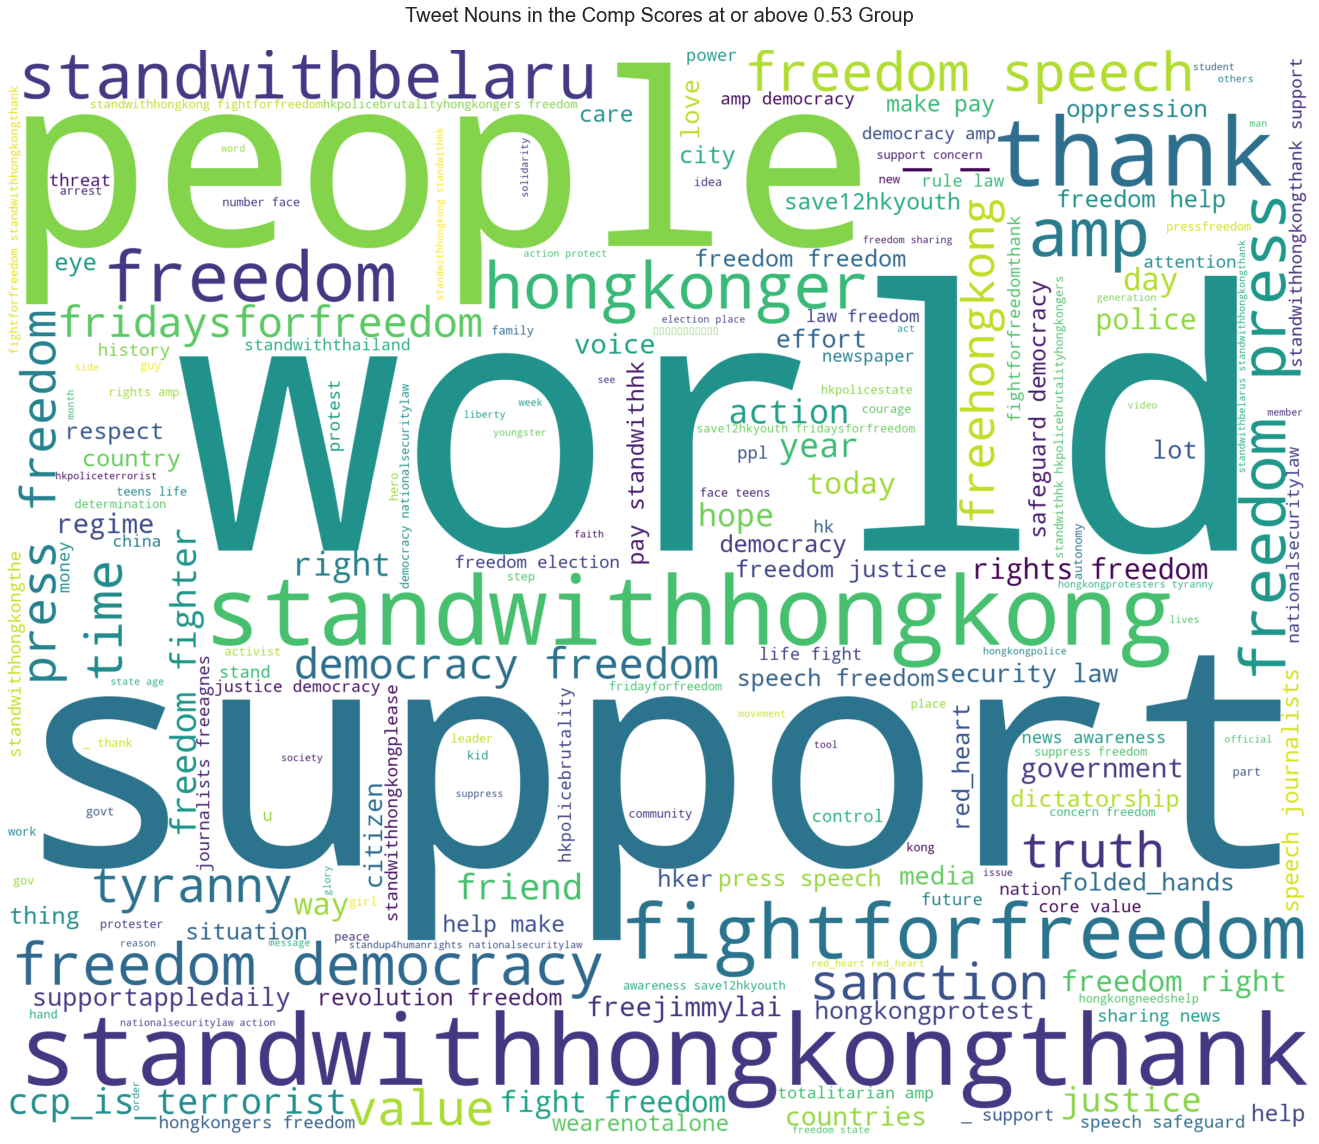

In [26]:
newText_t_noun =''
for word in doc:
    if word.pos_ in ['NOUN']:
        newText_t_noun = ' '.join((newText_t_noun, word.text.lower()))

wordcloud_title = WordCloud(stopwords=STOPWORDS,background_color='white',width=2400,height=2000).generate(newText_t_noun)
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.title('Tweet Nouns in the Comp Scores at or above 0.53 Group\n', fontsize=20)
plt.axis('off')
plt.show()

In [27]:
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)

counts_neg = co.fit_transform(tw_above['tweet'])
counts_neg = pd.DataFrame(counts_neg.sum(axis=0),columns=co.get_feature_names())

# I will remove "obvious words" & incorrect word bi-grams
counts_neg = counts_neg.drop(columns = ['hong kong'])

counts_neg = counts_neg.T.sort_values(0,ascending=False)
counts_neg.columns = ['word_count']
counts_neg = counts_neg.head(30)
# counts_l_a.head(20)

Text(0.5, 1.0, 'Top 30 Bigrams Tweeters used in the at or above 0.53 Comp Score Group')

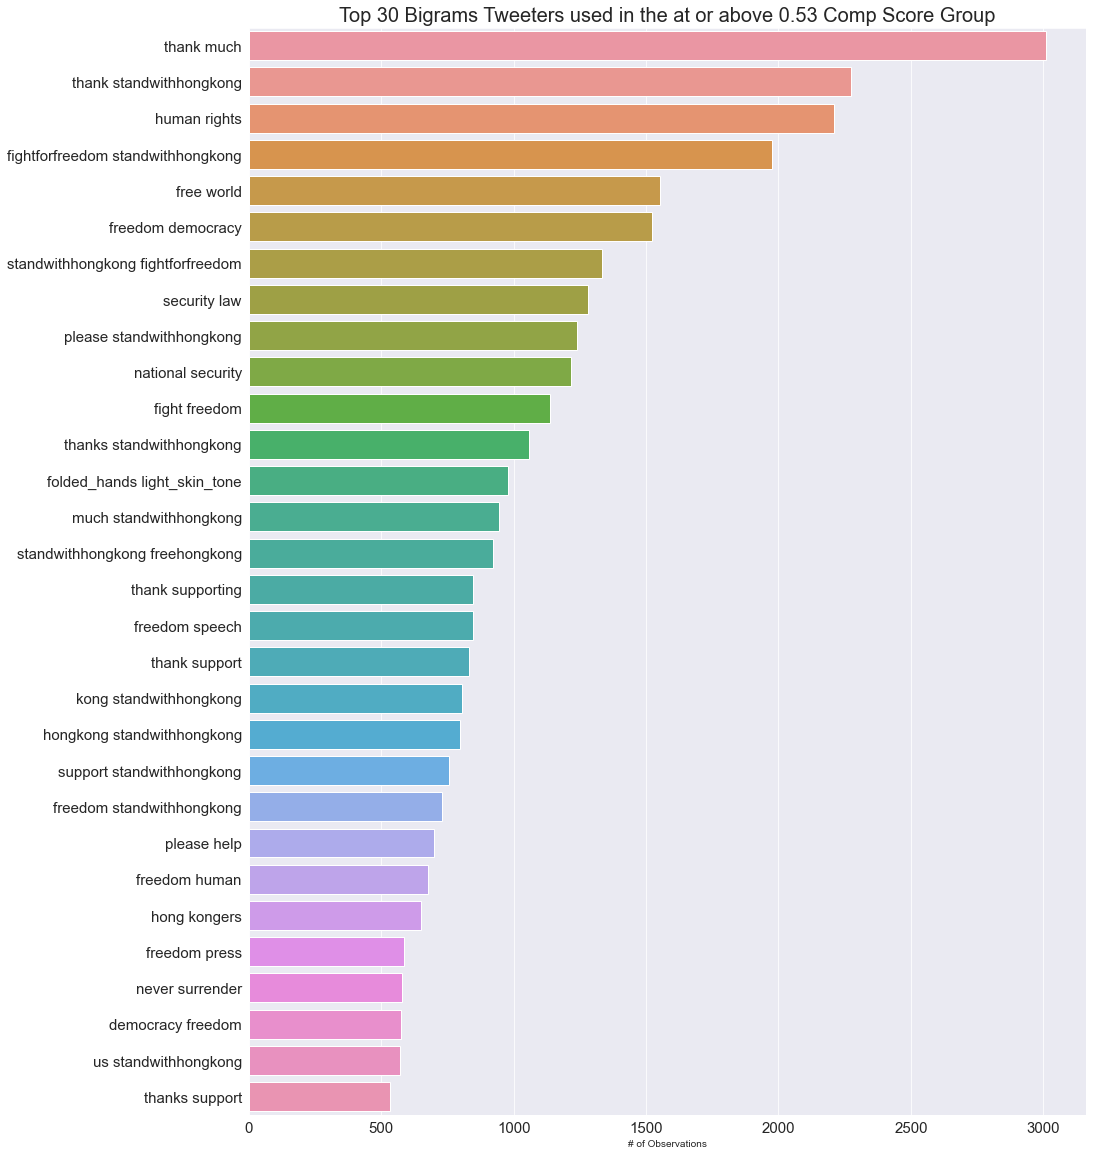

In [28]:
counts_neg_top = counts_neg.head(30)
counts_neg_top = counts_neg_top.reset_index()
counts_neg_top.columns = ['word','word_count']

fig, ax = plt.subplots(figsize=(15, 20))
sns.barplot(y = 'word',x = 'word_count',
            data = counts_neg_top.sort_values('word_count',ascending = False))
ax.set_xlabel('word_count')
plt.xlabel("# of Observations")
plt.ylabel("")
plt.tick_params(labelsize=15)
plt.title("Top 30 Bigrams Tweeters used in the at or above 0.53 Comp Score Group",fontsize=20)


**Positive Word Summary** | Many of the Tweets that were deemed `Positive` use Bigrams such as:
   * Thanks much / support
   * Human Rights
   * Free World
   * Please standwithhongkong / help
   * folded_hands ( 🙏 )
   * freedom press / democracy
   * etc.
   

**Results Together** | We will reiterate the results below:
   * Top 30 **Negative** Bigrams:
     * Human Rights
     * Evil CCP
     * References to Freedom / Democracy
     * Police Brutality
     * Fighting
     * Holdings Hands ( 👬 )

   * Top 30 **Positive** Bigrams:
     * Thanks much / support
     * Human Rights
     * Free World
     * Please standwithhongkong / help
     * folded_hands ( 🙏 )
     * freedom press / democracy

**Initial EDA Summary** | Looking at these results, there may be a categorization of:
   * Police
     * Who the Tweeters may be fighting, deem as evil & wish to hold hands in unity ( either with the Police, other Tweeters or both )
   * Support
     * Which the Tweeters are thankful for, it helps & it "may" be coming from a place they call the free world 



In [29]:
df_sup = df.copy()
df_sup = df_sup.reset_index()
df_sup = df_sup.drop(columns=['index','username','replies_count','retweets_count','likes_count','reply_to','hashtags'])
df_sup['tweet_review'] = df_sup['tweet'].str.lower()
# df_sup.head(2)

In [30]:
# creating the master here
df_sup['tweet_review'] = df_sup['tweet'].str.contains('thanks|folded_hands', regex=True)

In [31]:
df_sup = df_sup[df_sup['tweet_review'] == True]
df_sup = df_sup.reset_index()
df_sup = df_sup.drop(columns=['index'])

In [32]:
len(df_sup)

6176

In [33]:
#subcategories
df_sup_up = df_sup[df_sup['hash'].isin(['#PrayForHongkong', '#WeAreNotAlone', '#nochinaextradition','#standwithhongkong'])].copy()
df_sup_mid = df_sup[df_sup['hash'].isin(['#FightForHongKong', '#HongKongProtest', '#hkprotests','#freehongkong'])].copy()
df_sup_down = df_sup[df_sup['hash'].isin(['#HKpoliceterrorist', '#hkpoliceterrorism', '#hkpolicestate','#hkpolicebrutality'])].copy()


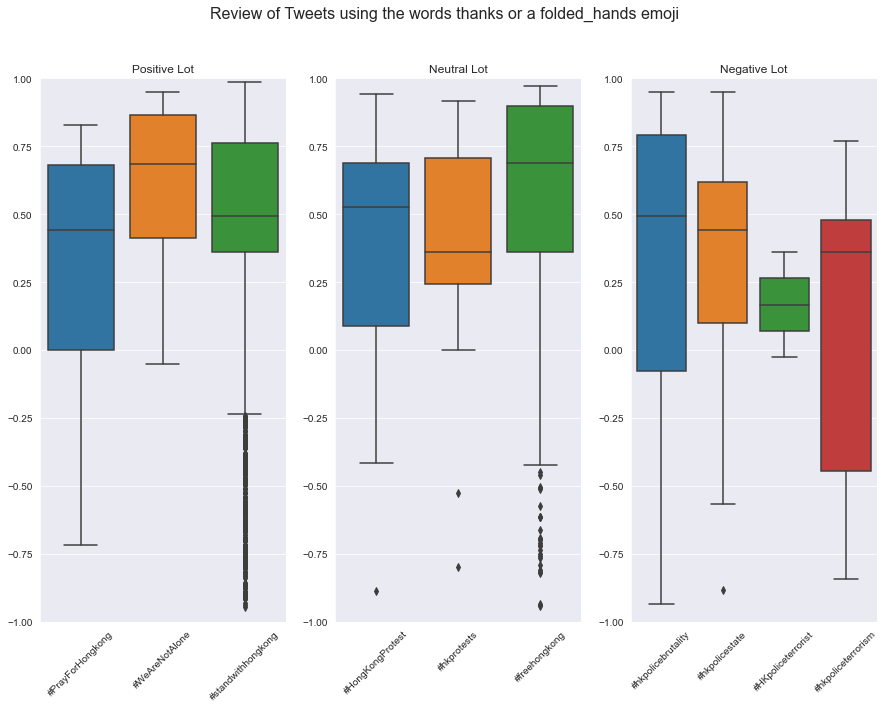

In [34]:
#Box Plot review of tweets that used the words thanks, support or a folded_hands emoji 
fig, ax = plt.subplots(1,3, figsize=(15,10))
plt.suptitle("Review of Tweets using the words thanks or a folded_hands emoji", size=16)
a = sns.boxplot(ax=ax[0], x="hash", y="comp", data=df_sup_up)
a.set(title='Positive Lot')
a.set(xlabel='', ylabel='')
a.set_xticklabels(a.get_xticklabels(),rotation=45)
a.set(ylim=(-1, 1))

b = sns.boxplot(ax=ax[1],x="hash", y="comp", data=df_sup_mid)
b.set(title='Neutral Lot')
b.set(xlabel='', ylabel='')
b.set_xticklabels(b.get_xticklabels(),rotation=45)
b.set(ylim=(-1, 1))

c = sns.boxplot(ax=ax[2],x = "hash", y="comp", data=df_sup_down)
c.set(title='Negative Lot')
c.set(xlabel='', ylabel='')
c.set_xticklabels(c.get_xticklabels(),rotation=45)
c.set(ylim=(-1, 1))

plt.show()

**Box Plot Summary** | It appears as though there's no clear distinction between Police & others.

**Let's see if there's any connections with geopolitical entities.**

In [35]:
# https://investigate.ai/text-analysis/named-entity-recognition/

In [36]:
df_sup_f = df_sup['tweet'].copy()

In [37]:
type(df_sup_f)

pandas.core.series.Series

In [38]:
df_sup_f.head()

0    Thank Japan🇯🇵 loudly_crying_face folded_hands ...
1    Thank supporting crying_cat_face folded_hands ...
2    , thanks everything done Hong Kong #FreeHongKo...
3    Congrats thanks #StandWithHongKong #StandWithH...
4    _Andrea Thank #StandwithHongKong! 🥺 folded_han...
Name: tweet, dtype: object

In [39]:
# pulling all the tweets into cell for review
df_sup_f = df_sup_f.str.cat(sep=' ')

# The United States is referred to in various ways; we will push them all into one
df_sup_f = df_sup_f.replace('USA','US')
df_sup_f = df_sup_f.replace('America','US')
df_sup_f = df_sup_f.replace('United States','US')
df_sup_f = df_sup_f.replace('U.S.','US')
df_sup_f = df_sup_f.replace('America 🇺 🇸','US')
df_sup_f = df_sup_f.replace('California','US')
df_sup_f = df_sup_f.replace('🇺 🇸','US')

# So is the United Kingdom; we will push them all into one
df_sup_f = df_sup_f.replace('Britain','UK')
df_sup_f = df_sup_f.replace('United Kingdom','UK')

# And the others.
df_sup_f = df_sup_f.replace('🇯 🇵','Japan')
df_sup_f = df_sup_f.replace('Paris','France')


In [40]:
def check_len(x):
    if len(x) >= 1000000:
        print("{:,}".format(len(x)),'| Given the parser & NER models requires a max length of 1M, we unfortunately have to cut.')
        x = x[:999999]
        
    else:
        print("{:,}".format(len(x)),'| Although the parser & NER models requires a max length of 1M, we don\'t need to do anything for this one.')
        None
            

In [41]:
check_len(df_sup_f)

962,828 | Although the parser & NER models requires a max length of 1M, we don't need to do anything for this one.


In [42]:
doc = nlp(df_sup_f)
entities = [(ent.text, ent.label_, ent.lemma_) for ent in doc.ents]
df_ner = pd.DataFrame(entities, columns=['text', 'type', 'lemma'])

In [43]:
df_ner.head(2)

,text,type,lemma
0,Japan,GPE,Japan
1,light_skin_tone,GPE,light_skin_tone


In [44]:
df_ner_gpe = df_ner[df_ner.type == 'GPE'].lemma.value_counts()

In [45]:
df_ner_gpe.head(5)

light_skin_tone    1388
Hong Kong           738
China               267
US                  255
UK                  154
Name: lemma, dtype: int64

In [46]:
# the light_skin_tone emoji is not a geopolitical entity; thus we will drop & look at the top 5
df_ner_gpe = df_ner_gpe.drop(labels='light_skin_tone')
df_ner_gpe_bc = df_ner_gpe.head(5)

In [47]:
df_ner_gpe_bc = pd.DataFrame(df_ner_gpe.head(5))
df_ner_gpe_bc = df_ner_gpe_bc.reset_index()
df_ner_gpe_bc.columns = ['country','count']

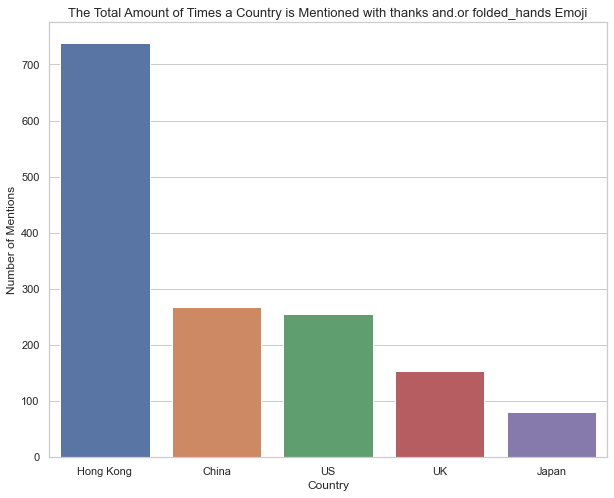

In [48]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="country", y="count", data=df_ner_gpe_bc)
plt.xlabel("Country",fontsize=12)
plt.ylabel("Number of Mentions",fontsize=12)
plt.title("The Total Amount of Times a Country is Mentioned with thanks and.or folded_hands Emoji",fontsize=13)
plt.show()

These results make sense as Hong Kong & China are the topics while the following three (3) countries align with our news section.

**What does seem strange is China takes the top spot after Hong Kong; let's take a look at what those tweets had. I have reason to believe they found fall into one of two categories:**
   * The Tweet community supports the Law and / or
   * The Tweet are sarcastic comments

In [49]:
df_sup_c = df_sup.copy()
df_sup_c['has_china'] = df_sup_c['tweet'].str.contains('China', regex=True)
df_sup_c['has_thanks'] = df_sup_c['tweet'].str.contains('thanks', regex=True)
df_sup_c['has_folded_hands'] = df_sup_c['tweet'].str.contains('folded_hands', regex=True)

index_names = df_sup_c[(df_sup_c['has_china'] == False)].index
df_sup_c.drop(index_names, inplace = True)
index_names = df_sup_c[(df_sup_c['has_thanks'] == False)].index
df_sup_c.drop(index_names, inplace = True)
index_names = df_sup_c[(df_sup_c['has_folded_hands'] == False)].index
df_sup_c.drop(index_names, inplace = True)

df_sup_ch = df_sup_c['tweet'].copy()
df_sup_ch = df_sup_ch.reset_index()
df_sup_ch = df_sup_ch.drop(columns=['index'])

c1 = df_sup_ch['tweet'][1]
c2 = df_sup_ch['tweet'][5]
c3 = df_sup_ch['tweet'][10]

print('Examples of observations with both thanks & folded_hands for China are below.','\n','\n',
     c1,'\n','\n',c2,'\n','\n',c3)

Examples of observations with both thanks & folded_hands for China are below. 
 
 Thank #StandWithHongKong !!! We sincerely hope free world stand firm Communist China’s human rights abuses Hong Kong. Many thanks folded_hands light_skin_tone 
 
 Deeply touched heartfelt thanks done #HK folded_hands light_skin_tone folded_hands light_skin_tone folded_hands light_skin_tone Always grateful international support fighting evil #CCPChina regime. #StandWithHongKong 
 
 Thank much #StandWithHongKong . folded_hands Although don’t know actually plans, still thanks UK helps. #newwestberlin #5DemandsNot1Less #BoycottChina


Based on the results, **I believe there is a fair bit of sarcasm**; a matter which will be further attended too.

Although mentions of the UK & free world are above, **I believe this sarcasm needs to be reviewed with the some of the others**. Since the US was not mentioned above & is that largest country contributing to the data frame with these conditions, **I will look at a snippet from the US in the same manner.**

In [50]:
df_sup_us = []

In [51]:
df_sup_us = df_sup.copy()
df_sup_us['has_us'] = df_sup_us['tweet'].str.contains('US', regex=True)
df_sup_us['has_thanks'] = df_sup_us['tweet'].str.contains('thanks', regex=True)
df_sup_us['has_folded_hands'] = df_sup_us['tweet'].str.contains('folded_hands', regex=True)

index_names = df_sup_us[(df_sup_us['has_us'] == False)].index
df_sup_us.drop(index_names, inplace = True)
index_names = df_sup_us[(df_sup_us['has_thanks'] == False)].index
df_sup_us.drop(index_names, inplace = True)
index_names = df_sup_us[(df_sup_us['has_folded_hands'] == False)].index
df_sup_us.drop(index_names, inplace = True)

df_sup_us = df_sup_us['tweet'].copy()
df_sup_us = df_sup_us.reset_index()
df_sup_us = df_sup_us.drop(columns=['index'])

us1 = df_sup_us['tweet'][0]
us2 = df_sup_us['tweet'][1]
us3 = df_sup_us['tweet'][2]

print('Examples of observations with both thanks & folded_hands for the US are below.','\n','\n',
     us1,'\n','\n',us2,'\n','\n',us3)

Examples of observations with both thanks & folded_hands for the US are below. 
 
 Heartfelt thanks standing solidarity Hongkongers folded_hands Pls consider implementation #MagnitskyAct sanction CCP &amp; HK officials violate "1country2systems" &amp; "high autonomy" promises Joint Declaration fire Let JUSTICE done UK #StandwithHongKong 
 
 _nozomi Thank much US UK,thanks always supportive us red_heart ️ folded_hands light_skin_tone #StandWithHongKong 
 
 As hongkonger, cannot save home without help US. We believe democracy freedom important everywhere world. HKers appreciate please see help ~ please save US HK folded_hands light_skin_tone #freehongkong #thanksTrump #thankUS


Based on the results, **I don't believe there is any sarcasm**; also a matter which will be further attended too.

At the end of the day, sarcasm is a tricky one & thus **these can't be 100% ruled out as not sarcastic but I don't see the word "thanks" or emoji "folded_hands" wrapped around criticism towards to the US seen in the China examples.**

**Let's revisit the main comp score & determine if there is much polarity from the tweets**.

We will use textblob for this exercise in the following order:
   * We will reassign to it's own data frame (as usual) to ensure the main one isn't disturbed.
   * We will then define a function to protect from a tweet not being a string.
   * Then review

In [52]:
df_tb = df.copy()
len(df_tb)

163699

In [53]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

df_tb['sentiment'] = df_tb['tweet'].apply(sentiment_calc)


In [54]:
# there appears to be one row that did not pass the sentiment scoring; let's double confirm
is_NaN = df_tb.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_tb[row_has_NaN]
print(rows_with_NaN.tweet)

132118    0
Name: tweet, dtype: object


In [55]:
# confirmed; let's drop it
df_tb = df_tb.drop([132118])
print((df_tb['sentiment'].isnull()).sum(),'| Number of columns that may not have passed.')

0 | Number of columns that may not have passed.


In [56]:
df_tb.tail(3)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,neg,neu,pos,tweet_stemmed,tweet_lemmatized,#_words_tweet,#_hashtags,sentiment
163696,#hkpoliceterrorism,2020-06-01,bluedreamsplan2,Don't fall trap! #HKPoliceTerrorism #HongKongP...,0,0,0,[],"['hkpoliceterrorism', 'hongkongpolicestate', '...",-0.3802,0.178,0.822,0.000,"['dont', 'fall', 'trap', 'hkpoliceterror', 'ho...","[""Don't"", 'fall', 'trap!', '#HKPoliceTerrorism...",11,5,"(0.0, 0.0)"
163697,#hkpoliceterrorism,2020-05-31,dingdin34098358,The HK police killed South Asian force. The HK...,0,1,1,"[{'screen_name': 'ajphelo', 'name': 'Andrew J ...","['policebrutality', 'hkpoliceterrorism']",-0.6705,0.200,0.800,0.000,"['hk', 'polic', 'kill', 'south', 'asian', 'for...","['The', 'HK', 'police', 'killed', 'South', 'As...",16,2,"(0.09999999999999999, 0.16666666666666666)"
163698,#hkpoliceterrorism,2020-05-31,bluedreamsplan2,China try hard link #Minnesotariots #HongKongP...,0,0,1,"[{'screen_name': 'OzraeliAvi', 'name': 'Avi Ye...","['minnesotariots', 'hongkongprotests', 'minnia...",0.6808,0.041,0.756,0.203,"['china', 'tri', 'hard', 'link', 'minnesotario...","['China', 'try', 'hard', 'link', '#Minnesotari...",23,5,"(-0.14583333333333334, 0.2708333333333333)"


Great. TextBlob return a tuple of form:
   * (polarity, subjectivity )

We will now split the `sentiment` column into `polarity` & `subjectivity`; the key values in the `sentiment array`.

In [57]:
senti_list = df_tb['sentiment'].tolist()
columns = ['polarity', 'subjectivity']
df_sentiment_split = pd.DataFrame(senti_list, columns=columns, index=df_tb.index)

In [58]:
#double checking the data frames are the same length
print(len(df_tb)-len(df_sentiment_split),'| Variance between the two')

0 | Variance between the two


In [59]:
df_tb_po = pd.concat([df_tb,df_sentiment_split],
                    axis = 1, ignore_index=False)

In [60]:
df_tb_po.head(3)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,neg,neu,pos,tweet_stemmed,tweet_lemmatized,#_words_tweet,#_hashtags,sentiment,polarity,subjectivity
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks speaking us #fridaysforfreedom #fightfo...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",0.4404,0.000,0.707,0.293,"['thank', 'speak', 'us', 'fridaysforfreedom', ...","['Thanks', 'speaking', 'u', '#fridaysforfreedo...",5,2,"(0.2, 0.2)",0.200000,0.200000
1,#FightForHongKong,2020-08-25,peterhjorth_ddp,How stop China Hong Kong. Read new report Dani...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",-0.2960,0.071,0.929,0.000,"['stop', 'china', 'hong', 'kong', 'read', 'new...","['How', 'stop', 'China', 'Hong', 'Kong.', 'Rea...",25,13,"(0.13636363636363635, 0.45454545454545453)",0.136364,0.454545
2,#FightForHongKong,2020-08-24,peterhjorth_ddp,How stop China Hong Kong. Read new report Dani...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",-0.2960,0.071,0.929,0.000,"['stop', 'china', 'hong', 'kong', 'read', 'new...","['How', 'stop', 'China', 'Hong', 'Kong.', 'Rea...",25,13,"(0.13636363636363635, 0.45454545454545453)",0.136364,0.454545


Here we will take a quick look at the TextBlob outputs.

In [63]:
twit_eda_tb = df_tb_po[['polarity','subjectivity']].copy()
twit_eda_tb.columns = ['Polarity','Subjectivity']

array([[<AxesSubplot:title={'center':'Polarity'}>,
        <AxesSubplot:title={'center':'Subjectivity'}>]], dtype=object)

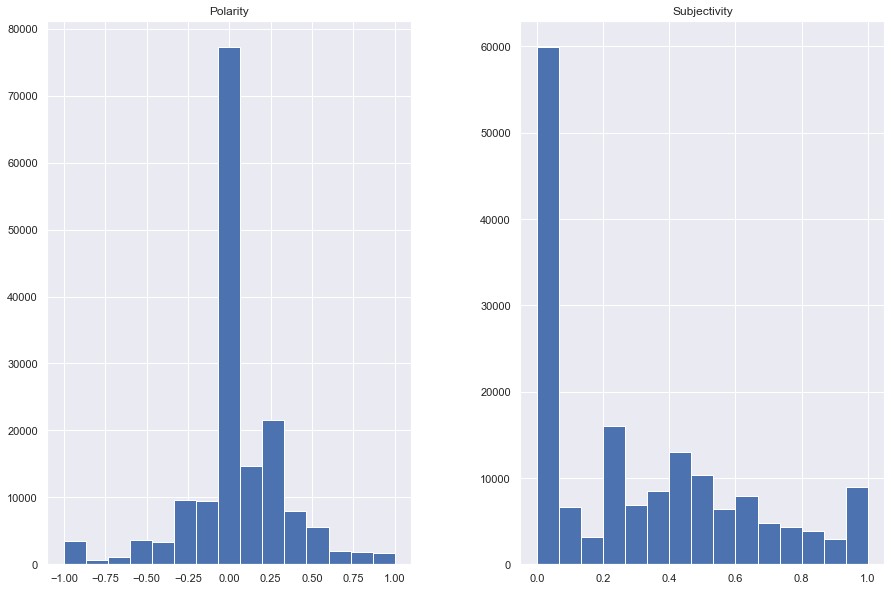

In [66]:
#caption = 'Comp Score represents the Final Score while the word \'Lot\' refers to the % allocated.'
sns.set_style('darkgrid')
twit_eda_tb.hist(bins = 15,figsize=(15,10))
#fig.text(.5, .5, caption, ha='center')

TextBlob Output can be understood by:
   * Polarity is a float within the range [-1.0, 1.0]
      * 1 means a Positive Statement & vice versa
   * Subjectivity is a float within the range [0.0, 1.0] 
     * 0.0 is very objective & 1.0 is very subjective.

With this, it **appears as though**:
   * Most of the **Tweets are Positive**
   * The **Tweets have Objective ( not Subjective ) grounds**
   * It is my understanding that TextBlob normally returns a high 0 scoce on Polarity; something to consider looking further into
   

Let's see how TextBlob's Polarity & Subjectivity talk with each other with a **Scatter Plot**

<AxesSubplot:xlabel='Polarity', ylabel='Subjectivity'>

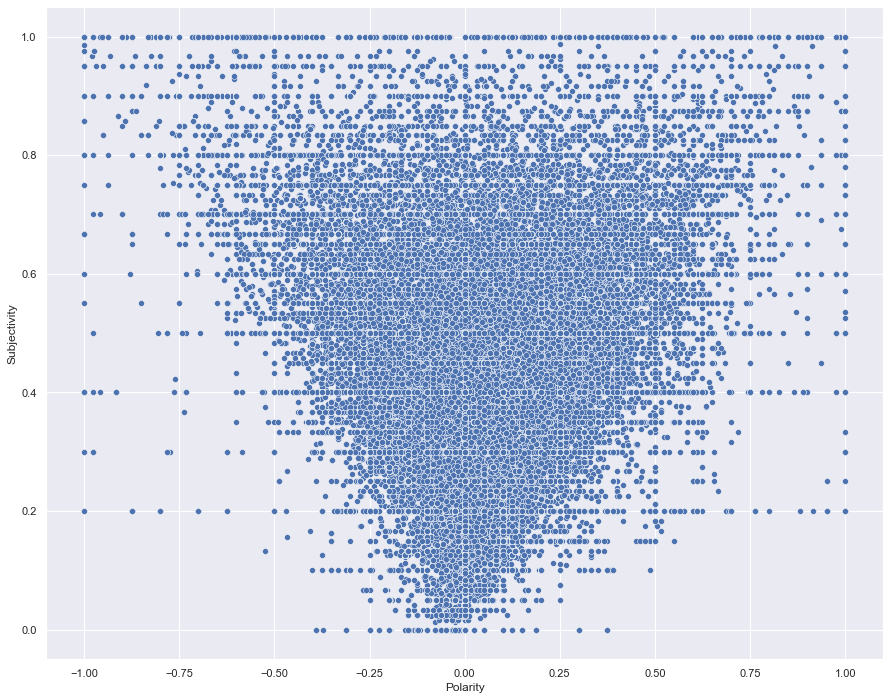

In [73]:
fig = plt.subplots(figsize=(15,12))
sns.set_style('darkgrid')
sns.scatterplot(data=df_tb_po, x="Polarity", y="Subjectivity")


Additional color coding for categories (discussed previously) may potentially add some color to this plethora of data points (no pun intended).

Let's now look at a Scatter Plot of Polarity with Tdidf Comp Scores.

<AxesSubplot:xlabel='polarity', ylabel='comp'>

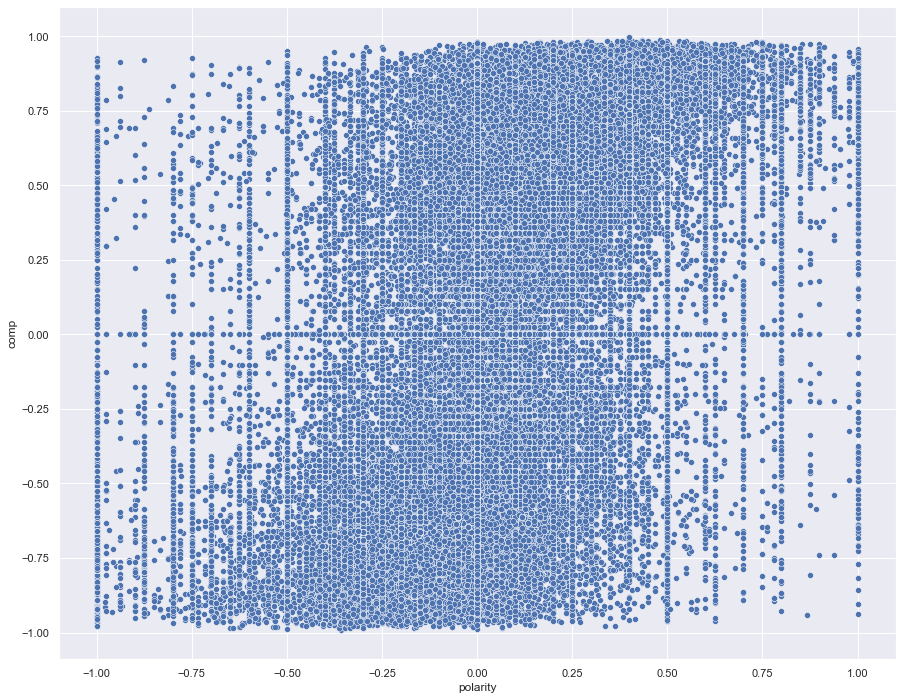

In [80]:
fig = plt.subplots(figsize=(15,12))
sns.set_style('darkgrid')
sns.scatterplot(data=df_tb_po, x="polarity", y="comp")


Same as the comment before.

<a id='eda_box'></a>**Box Plots** | xxxxxxxxxxxxxxxxx.

Based on the categories mentioned above, **we will see how they diffrentiate with a box plot on the `Comp Score`.**

In [16]:
#Box Plot review of news location source
#fig, ax = plt.subplots(1,3, figsize=(15,10))
#a = sns.boxplot(ax=ax[0], x="local", y="comp_title", data=news_title_tfidf_wordc)
#a.set(title='Comp Score ( Titles )')
#a.set(xlabel='News Category', ylabel='')
#a.set(ylim=(-1, 1))

#b = sns.boxplot(ax=ax[1],x="local", y="neg_title", data=news_title_tfidf_wordc)
#b.set(title='Negative Lot ( Titles )')
#b.set(xlabel='News Category', ylabel='')
#b.set(ylim=(-1, 1))

#c = sns.boxplot(ax=ax[2],x = "local", y="pos_title", data=news_title_tfidf_wordc)
#c.set(title='Positive Lot ( Titles )')
#c.set(xlabel='News Category', ylabel='')
#c.set(ylim=(-1, 1))

#plt.show()

<a id='eda_bar'></a>**Bar Charts** | xxxxxxxxxxxxxx.

**Textblob** | It's primary purposes herein is to determine how Subjective a tweet is.

In [19]:
#def polarity(text):
#    return TextBlob(text).sentiment.polarity
#
#news['polarity_score']=news['headline_text'].\
#   apply(lambda x : polarity(x))
#news['polarity_score'].hist()


We will now classify the Tweets as negative, positive & neutral based on the scores.

In [20]:
#def sentiment(x):
#    if x<0:
#        return 'neg'
#    elif x==0:
#        return 'neu'
#    else:
#        return 'pos'
#    
#news['polarity']=news['polarity_score'].\
#   map(lambda x: sentiment(x))

#plt.bar(news.polarity.value_counts().index,
#        news.polarity.value_counts())


Let's now look at **the Top 25 for both Positive & Negative.**

In [ ]:
#news[news['polarity']=='pos']['headline_text'].head()

In [ ]:
#news[news['polarity']=='neg']['headline_text'].head()

**Vader Sentiment Analysis** | It's primary purposes herein is to determine how Polarized a tweet is.

In [21]:
df_pol = df.copy()
df_pol["tweet"] = df_pol["tweet"].str.lower()
df_pol['tweet'] = df_pol['tweet'].astype(str)

In [22]:
df_pol.head(1)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,neg,neu,pos,tweet_stemmed,tweet_lemmatized,#_words_tweet,#_hashtags
0,#FightForHongKong,2020-08-28,ginny81025554,thanks speaking us #fridaysforfreedom #fightfo...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",0.4404,0.0,0.707,0.293,"['thank', 'speak', 'us', 'fridaysforfreedom', ...","['Thanks', 'speaking', 'u', '#fridaysforfreedo...",5,2


In [ ]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    return ss
    return np.argmax(list(ss.values())[:-1])

df_pol['polarity']=df_pol['tweet'].map(lambda x: get_vader_score(x))
polarity=df_pol['polarity'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(polarity.value_counts().index,
        polarity.value_counts())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rands\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# **2.5 Named Entity Recognition**<a id='eda_ner'></a>

<a id='eda_hist'></a>**xxxxxx** | xxxxxxxxxxxxx.

<a id='eda_hist'></a>**xxxxxx** | xxxxxxxxxxxxx.

# **2.6 Parts of Speech**<a id='eda_pos'></a>

<a id='eda_hist'></a>**xxxxxx** | xxxxxxxxxxxxx.

<a id='eda_hist'></a>**xxxxxx** | xxxxxxxxxxxxx.

# **2.7 Readability**<a id='eda_readability'></a>

<a id='eda_hist'></a>**xxxxxx** | xxxxxxxxxxxxx.

<a id='eda_hist'></a>**xxxxxx** | xxxxxxxxxxxxx.

# **2.____ EDA Summary**<a id='eda_summary'></a>